## This is the feature of plot time series usings cumulative relative frequently
##### Still in process

In [11]:
print ("This is the first notebooks, of all times")

This is the first notebooks, of all times


In [12]:
%pip install numpy
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('./uploads/Financial.csv')

In [14]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


In [15]:
df = df.reset_index(drop=True)
old_col = df.columns.tolist()
new_col = {}
for i in old_col:
    new_str = re.sub(r'\s+', '_', i)
    new_col[i] = new_str    

# update column name
df.rename(columns=new_col, inplace=True)

# df['_Sales_'] = df['_Sales_'].str.replace(' ', '')
# df['_COGS_'] = df['_COGS_'].str.replace(' ', '')
# df['_COGS_'] = df['_COGS_'].str.replace('$', '')
# df['_Gross_Sales_'] = df['_Gross_Sales_'].str.replace('$', '')

# df['_Gross_Sales_'] = df['_Gross_Sales_'].str.replace(' ', '')
# df['_Gross_Sales_'] = df['_Gross_Sales_'].str.replace('$', '')

df['_Profit_'] = df['_Profit_'].replace(r'[\s\-$()-,]', '', regex=True)
df['_Profit_'] = pd.to_numeric(df['_Profit_'], downcast='float')
df['_Profit_'] = df['_Profit_'].fillna(0)
df['Year_Month'] = df['Year'] + df['Month_Number']*0.1

# df.groupby(df['Year_Month']).sum(df['_Profit_'])
df1 = df.sort_values(by='Year_Month', ascending=True, inplace=False)
df1['Cumulative_Sum'] = df1['_Profit_'].cumsum()

df1

,Segment,Country,_Product_,_Discount_Band_,Units_Sold,_Manufacturing_Price_,_Sale_Price_,_Gross_Sales_,_Discounts_,_Sales_,_COGS_,_Profit_,Date,Month_Number,_Month_Name_,Year,Year_Month,Cumulative_Sum
433,Channel Partners,France,VTT,Medium,2234.0,$250.00,$12.00,"$26,808.00","$2,412.72","$24,395.28","$6,702.00",17693.28,9/1/2013,9,September,2013,2013.9,17693.28
22,Midmarket,France,Paseo,None,549.0,$10.00,$15.00,"$8,235.00",$-,"$8,235.00","$5,490.00",2745.00,9/1/2013,9,September,2013,2013.9,20438.28
532,Enterprise,Mexico,Amarilla,High,947.0,$260.00,$125.00,"$118,375.00","$13,021.25","$105,353.75","$113,640.00",8286.25,9/1/2013,9,September,2013,2013.9,28724.53
500,Channel Partners,Mexico,VTT,High,1005.0,$250.00,$12.00,"$12,060.00","$1,326.60","$10,733.40","$3,015.00",7718.40,9/1/2013,9,September,2013,2013.9,36442.93
338,Small Business,Germany,Paseo,Medium,1123.0,$10.00,$300.00,"$336,900.00","$23,583.00","$313,317.00","$280,750.00",32567.00,9/1/2013,9,September,2013,2013.9,69009.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Enterprise,Canada,VTT,Low,2729.0,$250.00,$125.00,"$341,125.00","$6,822.50","$334,302.50","$327,480.00",6822.50,12/1/2014,12,December,2014,2015.2,18375906.45
261,Small Business,Germany,Velo,Medium,1250.0,$120.00,$300.00,"$375,000.00","$18,750.00","$356,250.00","$312,500.00",43750.00,12/1/2014,12,December,2014,2015.2,18419656.45
493,Small Business,France,Amarilla,High,853.0,$260.00,$300.00,"$255,900.00","$25,590.00","$230,310.00","$213,250.00",17060.00,12/1/2014,12,December,2014,2015.2,18436716.45
130,Channel Partners,Mexico,Velo,Low,1084.0,$120.00,$12.00,"$13,008.00",$260.16,"$12,747.84","$3,252.00",9495.84,12/1/2014,12,December,2014,2015.2,18446212.29


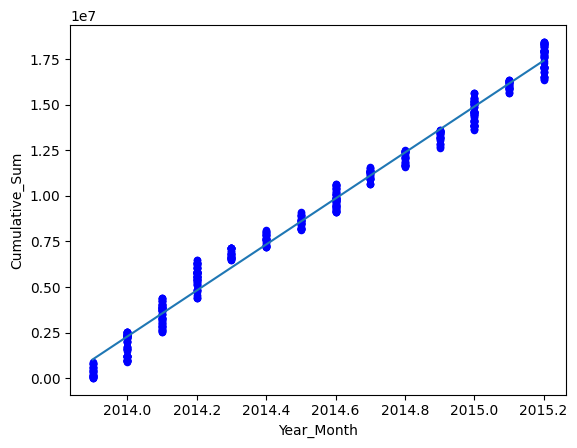

In [16]:
import numpy as np

# df.head()
plotlines = df1.plot.scatter(x='Year_Month', y='Cumulative_Sum', color='blue')  # 's' controls the size of
x= np.array(df1['Year_Month'].tolist())
y = np.array(df1['Cumulative_Sum'].tolist())
m, b = np.polyfit(x, y, 1)

plotlines.plot(x, m*x + b)

